### Part A - Q1 A - Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.

In [1]:
from zipfile import ZipFile

with ZipFile('plant-seedlings-classification.zip', 'r') as zipObj:
    #Extract all the contents of zip file in different directory
    zipObj.extractall('plant_seedlings_data')
    print('File is unzipped in plant_seedlings_data folder') 

File is unzipped in plant_seedlings_data folder


### Part A - Q1 B - Map the images from train folder with train labels to form a DataFrame.

In [2]:
import os
import cv2

dataset = "C:/Users/Kannan/Desktop/Learning/Great Learning/9_Convolutional Neural Network/Project/plant_seedlings_data/plant-seedlings-classification/train"
X = []
y = []
labels = []

# list all folders inside train directory
for i in os.listdir(dataset):
    if not i.startswith('.'):
        print(i)           
        labels.append(i)        
        for j in os.listdir(os.path.join(dataset, i)):
            # read each image inside train directory one by one
            dummy = cv2.imread(os.path.join(dataset, i, j))
            X.append(dummy)
            y.append(i)            

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [3]:
len(X), len(y)

(4750, 4750)

### Part A - Q1 C - Write a function that will select n random images and display images along with its species.

[1998 1474 3947  434 4095]


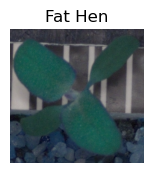

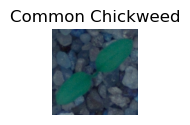

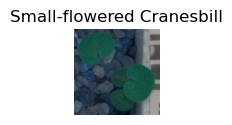

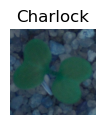

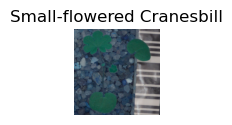

In [4]:
import matplotlib.pyplot as plt 
import numpy as np

def random_images(n):
    rand = np.random.randint(0, len(X), n) # Generating n random numbers out of total number of flowers
    print(rand)
    plt.figure(figsize=(10, 10))
    for i,j in enumerate(rand):
        plt.subplot(1, len(rand), i+1)
        plt.imshow(X[j])  # greens, reds, blues, rgb
        plt.title("{}".format(y[j]))
        plt.axis('off')
        plt.show()
        
random_images(5)

### Part A - Q2 A - Create X & Y from the DataFrame.

In [5]:
import pandas as pd

X = np.asarray(X)
y = np.asarray(y)

print(X.shape, y.shape)

(4750,) (4750,)


C:\Users\Kannan\AppData\Local\Temp\ipykernel_784\1432779770.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


### Part A - Q2 B - Encode labels of the images.

In [6]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(y)

y = tf.keras.utils.to_categorical(y)

### Part A - Q2 C - Unify shape of all the images.

In [7]:
def resize_image(img):
    img = np.asarray(img).astype(np.uint16)
    res = cv2.resize(img, (70,70))
    return res

X = [resize_image(img) for img in X]

X = np.asarray(X)
print(X.shape)    

(4750, 70, 70, 3)


### Part A - Q2 D - Normalise all the images.

In [8]:
X = X/255

### Part A - Q3 A - Split the data into train and test data.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Part A - Q3 B - Create new CNN architecture to train the model.

In [10]:
clf = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (70,70,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12,activation = "softmax")   #Adding the Output Layer
])

In [11]:
opt = tf.keras.optimizers.Adam()
clf.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Part A - Q3 C - Train the model on train data and validate on test data.

In [12]:
# Fit the model
histroy = clf.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16, verbose=2)

Epoch 1/30
238/238 - 21s - loss: 2.4369 - accuracy: 0.1237 - val_loss: 2.4203 - val_accuracy: 0.1379 - 21s/epoch - 87ms/step
Epoch 2/30
238/238 - 19s - loss: 2.4204 - accuracy: 0.1476 - val_loss: 2.4086 - val_accuracy: 0.1442 - 19s/epoch - 80ms/step
Epoch 3/30
238/238 - 19s - loss: 2.0151 - accuracy: 0.2800 - val_loss: 2.0113 - val_accuracy: 0.2832 - 19s/epoch - 80ms/step
Epoch 4/30
238/238 - 19s - loss: 1.7011 - accuracy: 0.3892 - val_loss: 1.5115 - val_accuracy: 0.4316 - 19s/epoch - 79ms/step
Epoch 5/30
238/238 - 19s - loss: 1.4872 - accuracy: 0.4671 - val_loss: 1.4416 - val_accuracy: 0.4558 - 19s/epoch - 82ms/step
Epoch 6/30
238/238 - 19s - loss: 1.3369 - accuracy: 0.5176 - val_loss: 1.2552 - val_accuracy: 0.5326 - 19s/epoch - 79ms/step
Epoch 7/30
238/238 - 19s - loss: 1.2465 - accuracy: 0.5529 - val_loss: 1.1659 - val_accuracy: 0.5779 - 19s/epoch - 79ms/step
Epoch 8/30
238/238 - 20s - loss: 1.0869 - accuracy: 0.6034 - val_loss: 0.9945 - val_accuracy: 0.6453 - 20s/epoch - 83ms/step


In [13]:
loss, accuracy = clf.evaluate(X_test, y_test)  # Evaluate on test set

print('Accuracy:', accuracy)

30/30 [==============================] - 1s 42ms/step - loss: 0.9114 - accuracy: 0.7589
Accuracy: 0.7589473724365234


### Part A - Q3 D - Select a random image and print actual label and predicted label for the same.

In [14]:
prediction = clf.predict(X_test)

print('Probabilities: ', prediction[14])
print('\n')
print('Prediction: ', np.argmax(prediction[14]))

Probabilities:  [2.8161352e-04 4.2508120e-05 5.0860690e-04 4.3096338e-04 4.5523560e-03
 5.6690738e-02 1.3444737e-04 2.1844702e-04 3.0383945e-02 1.3923547e-03
 2.5121704e-05 9.0533894e-01]


Prediction:  11


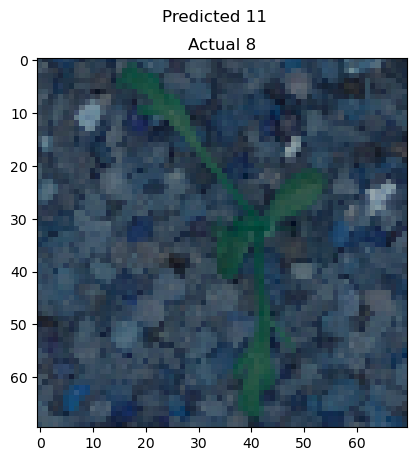

In [15]:
plt.imshow(X_test[14])
plt.title('Actual {}'.format(np.argmax(y_test[14])))
plt.suptitle('Predicted {}'.format(np.argmax(prediction[14])))
plt.show()

### Part B - Q1 A - Import and read oxflower17 dataset from tflearn and split into X and Y while loading.

In [16]:
import tflearn.datasets.oxflower17 as oxflower17 # Importing dataset

X,y = oxflower17.load_data()

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


### Part B - Q1 B - Print Number of images and shape of the images.

In [17]:
print('Number of images {}'.format(len(X)))
print('Shape of images {}'.format(X.shape[1:4]))

Number of images 1360
Shape of images (224, 224, 3)


### Part B - Q1 C - Print count of each class from y.

In [18]:
Class, count_of_each_class = np.unique(y,
                              return_counts = True)

print(Class)
print(count_of_each_class)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80]


### Part B - Q2 A - Display 5 random images.

[870 409 460  73  98]


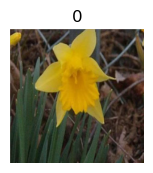

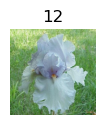

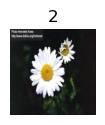

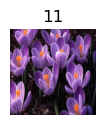

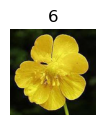

In [19]:
rand = np.random.randint(0, len(X), 5) # Generating 5 random numbers 
print(rand)
plt.figure(figsize=(10, 10))

for i,j in enumerate(rand):
        plt.subplot(1,len(rand),i+1)
        plt.imshow(X[j])  
        plt.title("{}".format(y[j]))
        plt.axis('off')
        plt.show()    

### Part B - Q2 B - Select any image from the dataset and assign it to a variable.

In [20]:
from PIL import Image
  
original_img = r"C:\Users\Kannan\Desktop\Learning\Great Learning\9_Convolutional Neural Network\Project\17flowers\jpg\0\image_0018.jpg"
   
orgl_image = Image.open(original_img)

### Part B - Q2 C - Transform the image into grayscale format and display the same.

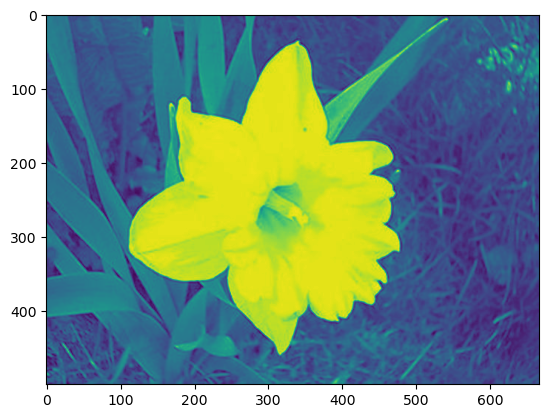

In [21]:
from PIL import ImageOps

gray_image = ImageOps.grayscale(orgl_image)
plt.imshow(gray_image)
plt.show()

### Part B - Q2 D - Apply a filter to sharpen the image and display the image before and after sharpening.

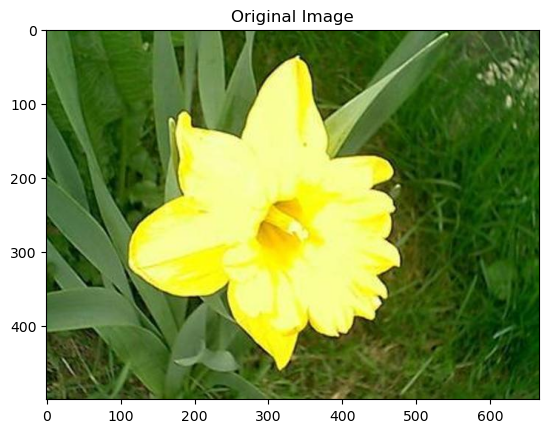

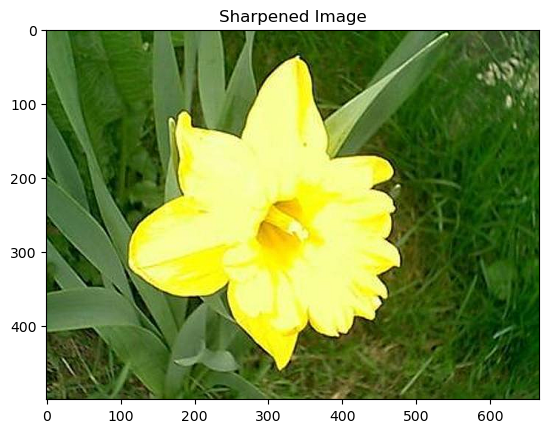

In [22]:
from PIL import ImageFilter
from PIL.ImageFilter import SHARPEN

sharpened_image = orgl_image.filter(SHARPEN)

plt.imshow(orgl_image)
plt.title('Original Image')
plt.show()

plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.show()

### Part B - Q2 E - Apply a filter to blur the image and display the image before and after blur. [2

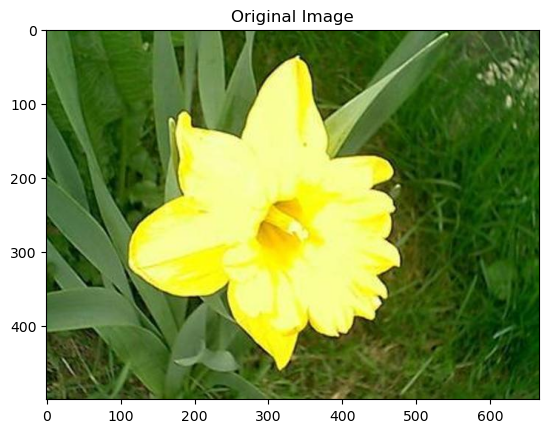

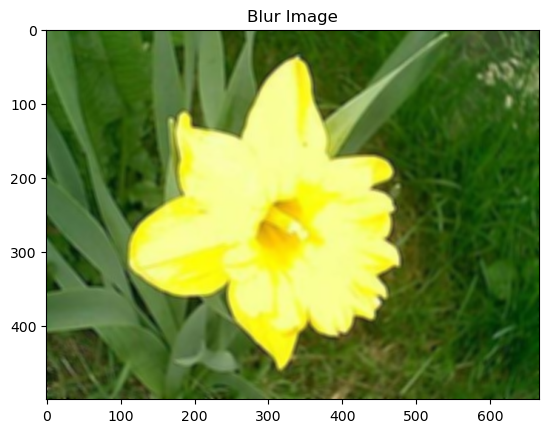

In [23]:
from PIL.ImageFilter import BLUR

blur_image = orgl_image.filter(BLUR)

plt.imshow(orgl_image)
plt.title('Original Image')
plt.show()

plt.imshow(blur_image)
plt.title('Blur Image')
plt.show()

### Part B - Q2 F - Display all the 4 images from above questions besides each other to observe the difference.

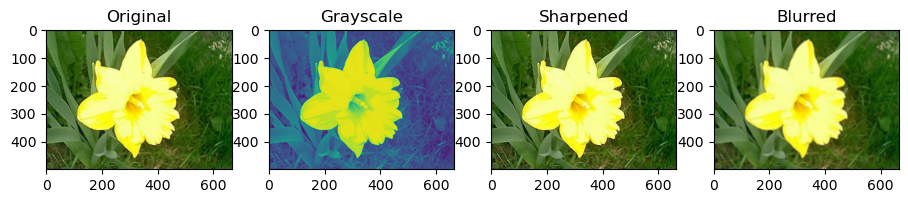

In [24]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11 ,7
f, axarr = plt.subplots(1,4)
axarr[0].imshow(orgl_image)
axarr[1].imshow(gray_image)
axarr[2].imshow(sharpened_image)
axarr[3].imshow(blur_image)
axarr[0].title.set_text('Original')
axarr[1].title.set_text('Grayscale')
axarr[2].title.set_text('Sharpened')
axarr[3].title.set_text('Blurred')
plt.show()

### Part B - Q3 A - Split the data into train and test with 80:20 proportion.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)

### Part B - Q3 B - Train a model using any Supervised Learning algorithm and share performance metrics on test data.

In [26]:
# Reshaping the train and test data as per the SL model requirement

X_train_rf = X_train.reshape(X_train.shape[0], 150528) # 224X224X3 = 150528
X_train_rf = X_train_rf/255 # normalise

X_test_rf = X_test.reshape(X_test.shape[0], 150528)
X_test_rf = X_test_rf/255 # normalise

print('Train_Shape:', X_train_rf.shape, y_train.shape)
print('Test_Shape:', X_test_rf.shape, y_test.shape)

Train_Shape: (1088, 150528) (1088,)
Test_Shape: (272, 150528) (272,)


In [27]:
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=6)
model_RF.fit(X_train_rf, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test_rf)
RF_Train = model_RF.score(X_train_rf, y_train)
RF_Test = accuracy_score(y_test, pred_RF)   

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.9715073529411765
Test Accuracy: 0.4889705882352941


In [28]:
from sklearn.metrics import classification_report


print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.50      0.33      0.40        15
           2       0.79      0.85      0.81        13
           3       0.75      0.16      0.26        19
           4       0.52      0.60      0.56        20
           5       0.39      0.47      0.42        15
           6       0.43      0.53      0.48        19
           7       0.53      0.56      0.54        18
           8       0.75      0.75      0.75        16
           9       0.50      0.47      0.48        17
          10       0.44      0.41      0.42        17
          11       0.43      0.47      0.45        19
          12       0.67      0.57      0.62        14
          13       0.38      0.50      0.43        12
          14       0.20      0.33      0.25        12
          15       0.38      0.31      0.34        16
          16       0.53      0.82      0.64        11

    accuracy              

### Part B - Q3 C - Train a model using Neural Network and share performance metrics on test data. [4

In [29]:
# normalise

X_train_norm = X_train/255
X_test_norm = X_test/255

print('Train_Shape:', X_train_norm.shape, y_train.shape)
print('Test_Shape:', X_test_norm.shape, y_test.shape)

Train_Shape: (1088, 224, 224, 3) (1088,)
Test_Shape: (272, 224, 224, 3) (272,)


In [30]:
# ANN

model_ann = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224,224,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(17, activation='softmax')])

model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_ann.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 64)                9633856   
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)         

In [31]:
# fit the model

model_ann.fit(X_train_norm, y_train, epochs=30, validation_data=(X_test_norm, y_test), verbose=2)

Train on 1088 samples, validate on 272 samples
Epoch 1/30


C:\Users\Kannan\anaconda3\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 - 4s - loss: 3.4405 - acc: 0.0570 - val_loss: 2.8366 - val_acc: 0.0846 - 4s/epoch - 4ms/sample
Epoch 2/30
1088/1088 - 3s - loss: 3.1810 - acc: 0.0790 - val_loss: 2.8095 - val_acc: 0.0846 - 3s/epoch - 3ms/sample
Epoch 3/30
1088/1088 - 3s - loss: 3.0741 - acc: 0.0846 - val_loss: 2.7733 - val_acc: 0.0956 - 3s/epoch - 3ms/sample
Epoch 4/30
1088/1088 - 3s - loss: 2.9404 - acc: 0.1020 - val_loss: 2.7101 - val_acc: 0.1287 - 3s/epoch - 3ms/sample
Epoch 5/30
1088/1088 - 3s - loss: 2.8384 - acc: 0.1204 - val_loss: 2.7001 - val_acc: 0.0956 - 3s/epoch - 3ms/sample
Epoch 6/30
1088/1088 - 3s - loss: 2.7609 - acc: 0.1461 - val_loss: 2.7388 - val_acc: 0.0956 - 3s/epoch - 3ms/sample
Epoch 7/30
1088/1088 - 3s - loss: 2.6730 - acc: 0.1645 - val_loss: 2.5847 - val_acc: 0.1507 - 3s/epoch - 3ms/sample
Epoch 8/30
1088/1088 - 3s - loss: 2.5650 - acc: 0.1700 - val_loss: 2.4759 - val_acc: 0.1691 - 3s/epoch - 3ms/sample
Epoch 9/30
1088/1088 - 3s - loss: 2.5308 - acc: 0.1939 - val_loss: 2.4512 - val_acc

In [32]:
# accuracy

loss, accuracy = model_ann.evaluate(X_test_norm, y_test)
print('ANN Accuracy:', accuracy)

ANN Accuracy: 0.2389706


### Part B - Q3 D - Train a model using a basic CNN and share performance metrics on test data.

In [33]:
# CNN Architecture

model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu" , input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation ="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(17,activation = "softmax")
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 32)      

In [34]:
#fitting the model

model_cnn.fit(X_train_norm, y_train, epochs=30, validation_data=(X_test_norm, y_test))

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - 67s 61ms/sample - loss: 2.7502 - acc: 0.1397 - val_loss: 3.0217 - val_acc: 0.0441
Epoch 2/30
1088/1088 [==============================] - 62s 57ms/sample - loss: 2.3910 - acc: 0.2390 - val_loss: 5.4451 - val_acc: 0.0625
Epoch 3/30
1088/1088 [==============================] - 60s 55ms/sample - loss: 2.2256 - acc: 0.2803 - val_loss: 3.7533 - val_acc: 0.0625
Epoch 4/30
1088/1088 [==============================] - 59s 54ms/sample - loss: 2.1062 - acc: 0.3263 - val_loss: 5.2394 - val_acc: 0.0625
Epoch 5/30
1088/1088 [==============================] - 58s 54ms/sample - loss: 1.9899 - acc: 0.3575 - val_loss: 3.2753 - val_acc: 0.0662
Epoch 6/30
1088/1088 [==============================] - 58s 53ms/sample - loss: 1.8995 - acc: 0.4127 - val_loss: 3.5680 - val_acc: 0.1176
Epoch 7/30
1088/1088 [==============================] - 59s 54ms/sample - loss: 1.9093 - acc: 0.3805 - val_loss: 8.8819 - val

In [35]:
# accuracy

loss, accuracy = model_cnn.evaluate(X_test_norm, y_test)
print('CNN Accuracy:', accuracy)

CNN Accuracy: 0.22058824


### Part B - Q3 E - Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

In [36]:
# Random forest model and CNN model are overfitting. As compared to both ANN model is generalising well though the accuracy scores are low.

path = r"C:\Users\Kannan\Desktop\Learning\Great Learning\9_Convolutional Neural Network\Project\Prediction.jpg"

from skimage import transform
def load(filename):
        np_image = Image.open(filename)
        np_image = np.array(np_image).astype('float32')/255
        np_image = transform.resize(np_image, (224, 224, 3))
        np_image = np.expand_dims(np_image, axis=0)
        return np_image

image = load(path)
pred = model_ann.predict(image)
np.argmax(pred)

C:\Users\Kannan\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


2